In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:51<00:00, 23.7MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.4MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [5]:
# generating dataset (CampusX)

train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)

# Normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# generating dataset (Old Method)

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_ds = train_datagen.flow_from_directory(
    "/content/train",
    target_size = (256, 256),
    batch_size = 20,
    class_mode = "binary"
)

test_ds = test_datagen.flow_from_directory(
    "/content/test",
    target_size = (256, 256),
    batch_size = 20,
    class_mode = "binary",
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [6]:
# create CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = "valid", activation = "relu", input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "valid"))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size = (3, 3), padding = "valid", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "valid"))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size = (3, 3), padding = "valid", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "valid"))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size = (3, 3), padding = "valid", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "valid"))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 13,120,705 (50.05 MB)

 Trainable params: 13,120,001 (50.05 MB)

 Non-trainable params: 704 (2.75 KB)

In [8]:
from tensorflow.keras import optimizers
model.compile(optimizer = optimizers.RMSprop(learning_rate=1e-3), loss = "binary_crossentropy", metrics = ["accuracy"])

In [9]:
history = model.fit(train_ds, epochs=10, validation_data = test_ds, verbose=1, batch_size=20)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.6066 - loss: 1.8230 - val_accuracy: 0.6824 - val_loss: 0.7151
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7761 - loss: 0.4842 - val_accuracy: 0.6462 - val_loss: 0.8050
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.8196 - loss: 0.4087 - val_accuracy: 0.8152 - val_loss: 0.6290
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.8668 - loss: 0.3353 - val_accuracy: 0.5506 - val_loss: 6.0995
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.8863 - loss: 0.2874 - val_accuracy: 0.8630 - val_loss: 0.3324
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 86ms/step - accuracy: 0.9160 - loss: 0.2399 - val_accuracy: 0.8672 - val_loss: 0.3676
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.9245 - loss: 0.2170 - val_accuracy: 0.8870 - val_loss: 0.3283
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 90ms/step - accuracy: 0.9451 - loss: 0.1559 - 

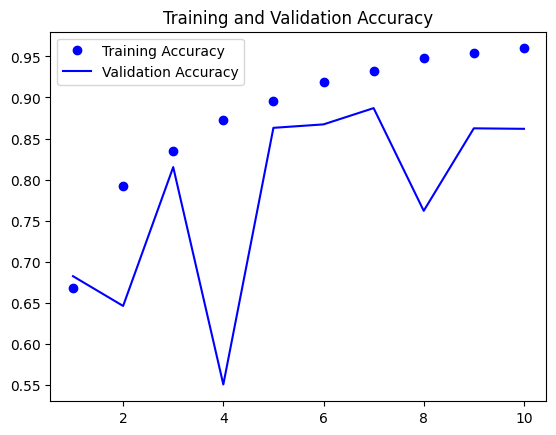

In [10]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.show()

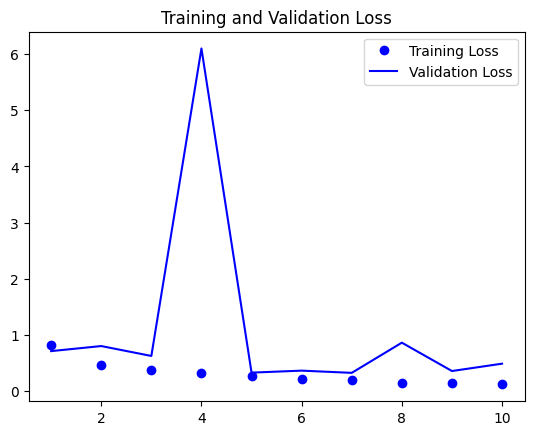

In [11]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

In [12]:
import cv2
import matplotlib.pyplot as plt

In [26]:
test_img = cv2.imread("/content/test/cats/cat.10074.jpg")

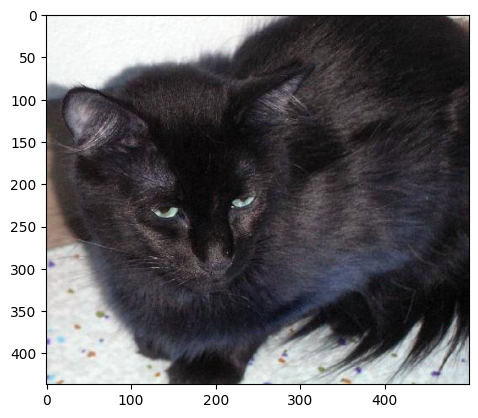

In [27]:
plt.imshow(test_img)

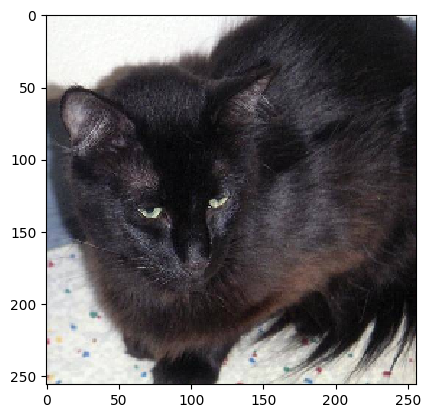

In [28]:
from tensorflow.keras.preprocessing import image
path = "/content/test/cats/cat.10074.jpg"
img = image.load_img(path, target_size = (256, 256))
plt.imshow(img, interpolation = "nearest")
plt.show()

In [29]:
img_arr = np.array(img)
img_arr.shape

(256, 256, 3)

In [30]:
img_arr = img_arr.reshape(1, 256, 256, 3)
img_arr

array([[[[247, 247, 245],
         [245, 245, 243],
         [242, 242, 240],
         ...,
         [212, 215, 220],
         [214, 213, 218],
         [211, 210, 215]],

        [[246, 246, 244],
         [246, 246, 244],
         [246, 246, 244],
         ...,
         [210, 213, 220],
         [218, 219, 224],
         [217, 218, 223]],

        [[243, 243, 241],
         [244, 244, 242],
         [245, 245, 243],
         ...,
         [176, 183, 191],
         [201, 204, 211],
         [204, 207, 214]],

        ...,

        [[237, 215, 201],
         [233, 216, 200],
         [231, 220, 202],
         ...,
         [220, 216, 204],
         [214, 210, 198],
         [211, 207, 195]],

        [[243, 233, 223],
         [234, 230, 219],
         [225, 225, 215],
         ...,
         [221, 218, 203],
         [219, 213, 201],
         [217, 211, 199]],

        [[230, 221, 214],
         [228, 223, 217],
         [227, 226, 221],
         ...,
         [223, 220, 205],
        

In [31]:
pred = model.predict(img_arr)
if pred==[0]:
  print("Cat")
else:
  print("Dog")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Cat


In [32]:
import pickle
pickle.dump(model, open("CatVsDog.pkl", "wb"))